# Redu√ß√£o de Dimensionalidade (DimRed)

- Banco de dados -> https://archive.ics.uci.edu/dataset/42/glass+identification

O objetivo era determinar se um vidro correspondia ao tipo "float" (vidro plano fabricado por flutua√ß√£o) ou n√£o.

A motiva√ß√£o principal do estudo est√° relacionada √† investiga√ß√£o forense, uma vez que fragmentos de vidro encontrados em cenas de crime podem servir como evid√™ncia, desde que corretamente identificados.

O conjunto de dados √© composto por 214 amostras de vidro, cada uma descrita por 10 atributos f√≠sico-qu√≠micos:

- ID: Identificador da amostra (1 a 214)

- RI: √çndice de refra√ß√£o

- Na: Teor de s√≥dio (Na‚ÇÇO) ‚Äì % em peso

- Mg: Magn√©sio (MgO) ‚Äì % em peso

- Al: Alum√≠nio (Al‚ÇÇO‚ÇÉ) ‚Äì % em peso

- Si: Sil√≠cio (SiO‚ÇÇ) ‚Äì % em peso

- K: Pot√°ssio (K‚ÇÇO) ‚Äì % em peso

- Ca: C√°lcio (CaO) ‚Äì % em peso

- Ba: B√°rio (BaO) ‚Äì % em peso

- Fe: Ferro (Fe‚ÇÇO‚ÇÉ) ‚Äì % em peso

O atributo alvo representa o tipo de vidro classificado em sete categorias:

- Janelas de edif√≠cios - float processado

- Janelas de edif√≠cios - n√£o float

- Janelas de ve√≠culos - float processado

- Janelas de ve√≠culos - n√£o float (ausente no conjunto)

- Recipientes

- Utens√≠lios de mesa

- Far√≥is

In [ ]:
# Instalando o R
R.version.string
# Isso instala o pacote do sistema GSL necess√°rio para o R
system("apt-get update")
system("apt-get install -y libgsl-dev libxml2-dev libssl-dev libcurl4-openssl-dev libfftw3-dev")

[1] "R version 4.5.0 (2025-04-11)"

In [ ]:
install.packages(c("dimRed", "RANN", "Rtsne", "fastICA", "umap", "diffusionMap", "kernlab"))

Installing packages into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

also installing the dependencies ‚ÄòCVST‚Äô, ‚ÄòRcppTOML‚Äô, ‚Äòhere‚Äô, ‚Äòpng‚Äô, ‚ÄòRcppEigen‚Äô, ‚ÄòDRR‚Äô, ‚Äòreticulate‚Äô, ‚ÄòRSpectra‚Äô, ‚Äòscatterplot3d‚Äô, ‚Äòigraph‚Äô




In [ ]:
install.packages("MVN")

Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

also installing the dependencies ‚Äòrbibutils‚Äô, ‚Äòcowplot‚Äô, ‚ÄòDeriv‚Äô, ‚Äòmicrobenchmark‚Äô, ‚ÄòRdpack‚Äô, ‚ÄònumDeriv‚Äô, ‚ÄòdoBy‚Äô, ‚ÄòSparseM‚Äô, ‚ÄòMatrixModels‚Äô, ‚Äòminqa‚Äô, ‚Äònloptr‚Äô, ‚Äòreformulas‚Äô, ‚Äòmnormt‚Äô, ‚ÄòGPArotation‚Äô, ‚Äògsl‚Äô, ‚ÄòcarData‚Äô, ‚Äòabind‚Äô, ‚ÄòFormula‚Äô, ‚Äòpbkrtest‚Äô, ‚Äòquantreg‚Äô, ‚Äòlme4‚Äô, ‚Äònortest‚Äô, ‚Äòpsych‚Äô, ‚Äòenergy‚Äô, ‚Äòcar‚Äô




In [ ]:
# Lista completa de pacotes necess√°rios
all_packages <- c(
  "moments", "reshape2", "ggplot2", "corrplot", "dimRed", "modeest", "coRanking",
  "MVN", "isotree", "fastICA", "Rtsne", "umap", "RANN", "diffusionMap", "gsl",
  "vegan", "kernlab"
)


# Fun√ß√£o para instalar se n√£o estiver instalado
install_if_missing <- function(pkg) {
  if (!requireNamespace(pkg, quietly = TRUE)) {
    message("Instalando pacote: ", pkg)
    tryCatch({
      install.packages(pkg, dependencies = TRUE)
    }, warning = function(w) {
      message("Aviso ao instalar ", pkg, ": ", conditionMessage(w))
    }, error = function(e) {
      message("Erro ao instalar ", pkg, ": ", conditionMessage(e))
    })
  }
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}

# Instalar e carregar todos os pacotes
invisible(lapply(all_packages, install_if_missing))

Registered S3 method overwritten by 'psych':
  method         from  
  plot.residuals rmutil

Instalando pacote: isotree

Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

also installing the dependencies ‚Äòbitops‚Äô, ‚Äògtools‚Äô, ‚ÄòcaTools‚Äô, ‚Äògplots‚Äô, ‚ÄòRcereal‚Äô, ‚ÄòvisNetwork‚Äô, ‚ÄòROCR‚Äô, ‚Äòsvglite‚Äô, ‚ÄòRhpcBLASctl‚Äô, ‚Äòoutliertree‚Äô, ‚ÄòDiagrammeR‚Äô, ‚Äòmlbench‚Äô, ‚ÄòMLmetrics‚Äô, ‚ÄòkableExtra‚Äô




In [ ]:
# Pacotes
library(moments)
library(reshape2)
library(ggplot2)
library(corrplot)
library(dimRed)
library(modeest)
library(coRanking)
library(MVN)
library(isotree)
required_packages <- c("dimRed", "RSpectra", "igraph", "RANN", "ggplot2",
                       "tidyr", "scales", "kernlab", "factoextra", "pcaL1", "coRanking", "dplyr", "reshape2", "moments", "GGally", "MVN", "corrplot")

In [ ]:
# Listar fun√ß√µes e m√©todos dispon√≠veis no namespace de dimRed
all_functions <- ls("package:dimRed")

# Exibir todas as fun√ß√µes e objetos dispon√≠veis
cat("Todas as fun√ß√µes e objetos dispon√≠veis em dimRed:\n")
print(all_functions)

# Listar todos os m√©todos de redu√ß√£o de dimensionalidade dispon√≠veis no pacote dimRed
all_methods <- dimRed::dimRedMethodList()

# Exibir todos os m√©todos de redu√ß√£o de dimensionalidade dispon√≠veis
cat("Todos os m√©todos de redu√ß√£o de dimensionalidade dispon√≠veis em dimRed:\n")
print(all_methods)

Todas as fun√ß√µes e objetos dispon√≠veis em dimRed:
 [1] "as.data.frame"          "as.dimRedData"          "AUC_lnK_R_NX"          
 [4] "cophenetic_correlation" "dataSetList"            "DiffusionMaps"         
 [7] "dimRedData"             "dimRedMethodList"       "dimRedQualityList"     
[10] "dimRedResult"           "distance_correlation"   "DrL"                   
[13] "DRR"                    "embed"                  "FastICA"               
[16] "FruchtermanReingold"    "getData"                "getDimRedData"         
[19] "getMeta"                "getNDim"                "getOrgData"            
[22] "getOtherData"           "getPars"                "getRotationMatrix"     
[25] "HLLE"                   "installSuggests"        "inverse"               
[28] "Isomap"                 "KamadaKawai"            "kPCA"                  
[31] "LCMC"                   "loadDataSet"            "maximize_correlation"  
[34] "MDS"                    "mean_R_NX"              "mixColor1Ra

In [ ]:
# Carregar o Dataset
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
glass_data <- read.csv(url, header = FALSE)
colnames(glass_data) <- c("ID", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type")
print(head(glass_data))
data <- glass_data[, -c(1)]  # Remover coluna ID
print(head(data))

  ID      RI    Na   Mg   Al    Si    K   Ca Ba   Fe Type
1  1 1.52101 13.64 4.49 1.10 71.78 0.06 8.75  0 0.00    1
2  2 1.51761 13.89 3.60 1.36 72.73 0.48 7.83  0 0.00    1
3  3 1.51618 13.53 3.55 1.54 72.99 0.39 7.78  0 0.00    1
4  4 1.51766 13.21 3.69 1.29 72.61 0.57 8.22  0 0.00    1
5  5 1.51742 13.27 3.62 1.24 73.08 0.55 8.07  0 0.00    1
6  6 1.51596 12.79 3.61 1.62 72.97 0.64 8.07  0 0.26    1
       RI    Na   Mg   Al    Si    K   Ca Ba   Fe Type
1 1.52101 13.64 4.49 1.10 71.78 0.06 8.75  0 0.00    1
2 1.51761 13.89 3.60 1.36 72.73 0.48 7.83  0 0.00    1
3 1.51618 13.53 3.55 1.54 72.99 0.39 7.78  0 0.00    1
4 1.51766 13.21 3.69 1.29 72.61 0.57 8.22  0 0.00    1
5 1.51742 13.27 3.62 1.24 73.08 0.55 8.07  0 0.00    1
6 1.51596 12.79 3.61 1.62 72.97 0.64 8.07  0 0.26    1


In [ ]:
# Contar o n√∫mero de tipos √∫nicos de vidro no dataset
unique_types <- unique(glass_data$Type) # Extrai os valores √∫nicos presentes na coluna Type, correspondendo aos tipos de vidro.
num_types <- length(unique_types) #Conta o n√∫mero de valores √∫nicos, indicando quantos tipos de vidro diferentes existem.

# Exibir o n√∫mero de tipos de vidro e as categorias presentes
cat("N√∫mero de tipos de vidro:", num_types, "\n")
cat("Tipos de vidro:", unique_types, "\n")

N√∫mero de tipos de vidro: 6 
Tipos de vidro: 1 2 3 5 6 7 


In [ ]:
# Verificar o balanceamento da vari√°vel alvo (Type)
class_counts <- table(glass_data$Type)

# Exibir os resultados
print(class_counts)


 1  2  3  5  6  7 
70 76 17 13  9 29 


# An√°lise Explorat√≥ria de Dados (EDA)

In [ ]:
# Fun√ß√£o para calcular estat√≠sticas descritivas
calcular_estatisticas <- function(df) {
  for (col in colnames(df)) {
    cat("\nüìä Vari√°vel:", col, "\n")
    media <- mean(df[[col]])
    mediana <- median(df[[col]])
    moda <- mfv(df[[col]])  # Moda com fun√ß√£o do pacote modeest
    desvio_padrao <- sd(df[[col]])
    coef_var <- (desvio_padrao / media) * 100

    cat("M√©dia:", round(media, 3), "\n")
    cat("Mediana:", round(mediana, 3), "\n")
    cat("Moda:", paste(round(moda, 3), collapse = ", "), "\n")
    cat("Desvio padr√£o:", round(desvio_padrao, 3), "\n")
    cat("Coeficiente de varia√ß√£o (%):", round(coef_var, 2), "\n")
  }
}

# Aplicar a fun√ß√£o no dataset
calcular_estatisticas(data)


üìä Vari√°vel: RI 
M√©dia: 1.518 
Mediana: 1.518 
Moda: 1.516, 1.516, 1.522 
Desvio padr√£o: 0.003 
Coeficiente de varia√ß√£o (%): 0.2 

üìä Vari√°vel: Na 
M√©dia: 13.408 
Mediana: 13.3 
Moda: 13, 13.02, 13.21 
Desvio padr√£o: 0.817 
Coeficiente de varia√ß√£o (%): 6.09 

üìä Vari√°vel: Mg 
M√©dia: 2.685 
Mediana: 3.48 
Moda: 0 
Desvio padr√£o: 1.442 
Coeficiente de varia√ß√£o (%): 53.73 

üìä Vari√°vel: Al 
M√©dia: 1.445 
Mediana: 1.36 
Moda: 1.54 
Desvio padr√£o: 0.499 
Coeficiente de varia√ß√£o (%): 34.55 

üìä Vari√°vel: Si 
M√©dia: 72.651 
Mediana: 72.79 
Moda: 72.86, 72.99, 73.1, 73.11, 73.28 
Desvio padr√£o: 0.775 
Coeficiente de varia√ß√£o (%): 1.07 

üìä Vari√°vel: K 
M√©dia: 0.497 
Mediana: 0.555 
Moda: 0 
Desvio padr√£o: 0.652 
Coeficiente de varia√ß√£o (%): 131.21 

üìä Vari√°vel: Ca 
M√©dia: 8.957 
Mediana: 8.6 
Moda: 8.03, 8.43 
Desvio padr√£o: 1.423 
Coeficiente de varia√ß√£o (%): 15.89 

üìä Vari√°vel: Ba 
M√©dia: 0.175 
Mediana: 0 
Moda: 0 
Desvio padr√£o: 0.49

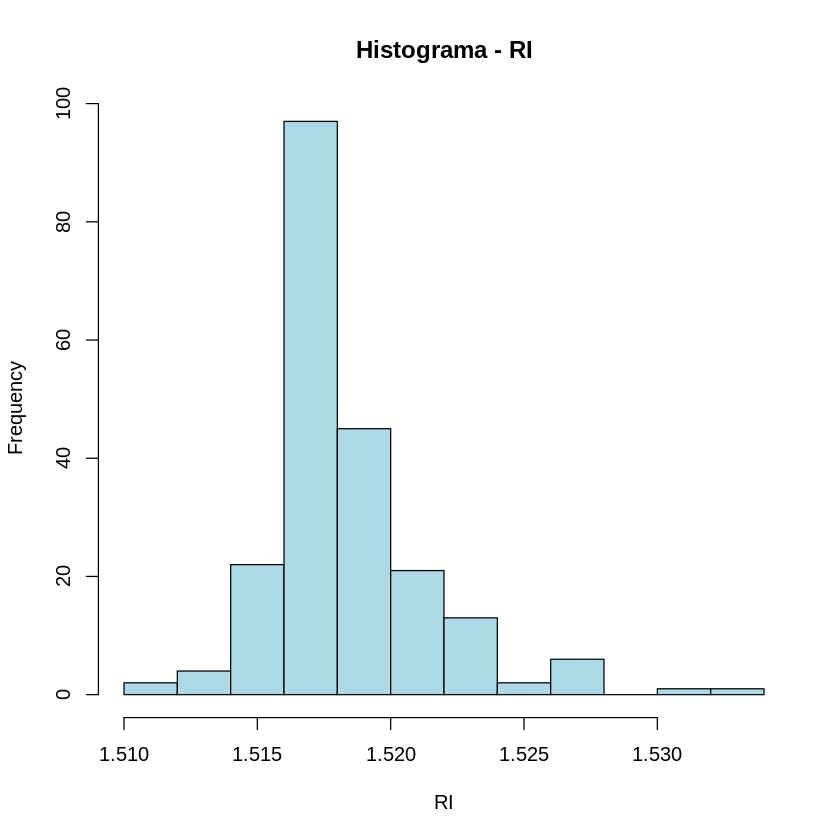

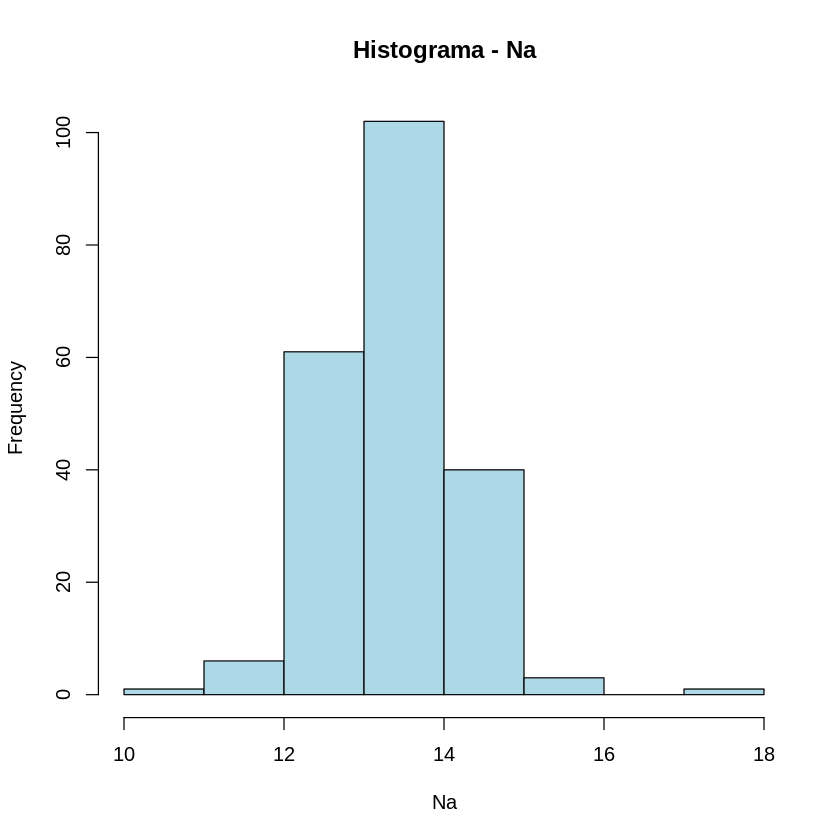

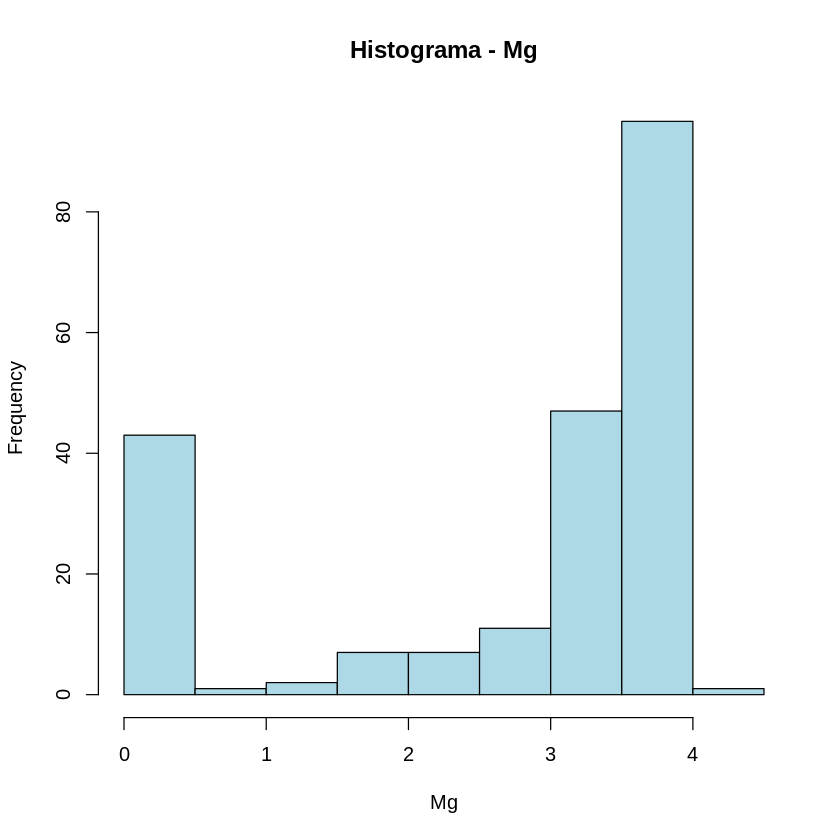

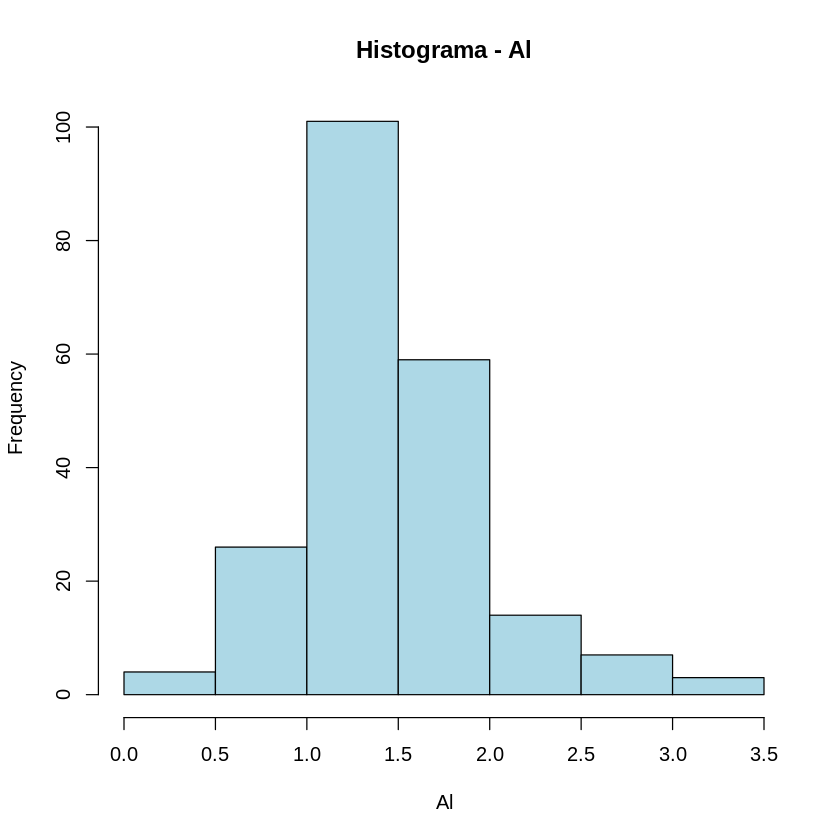

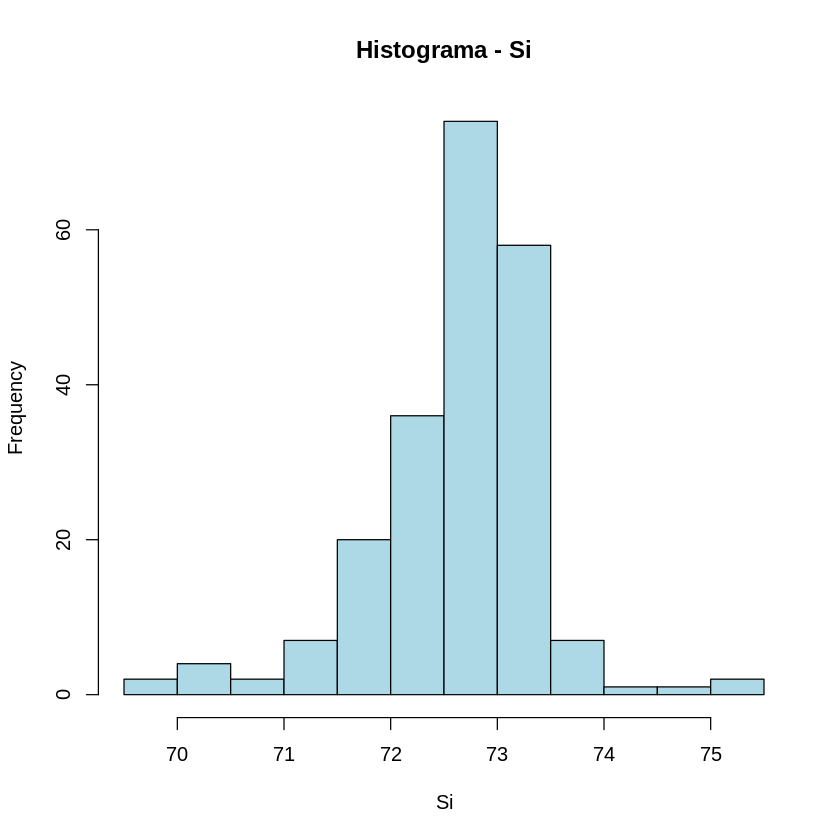

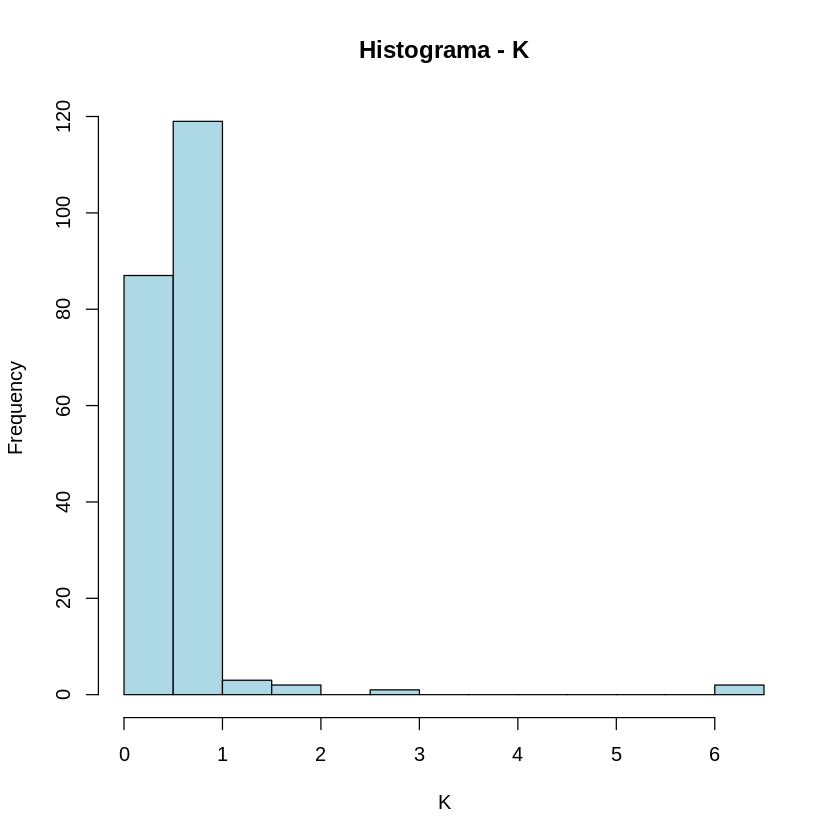

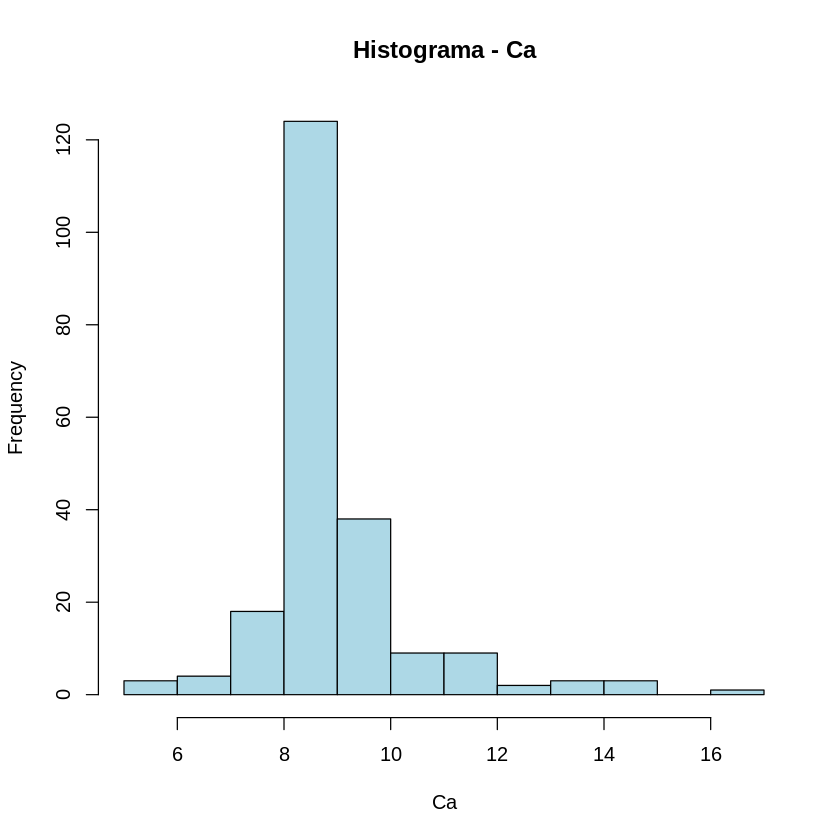

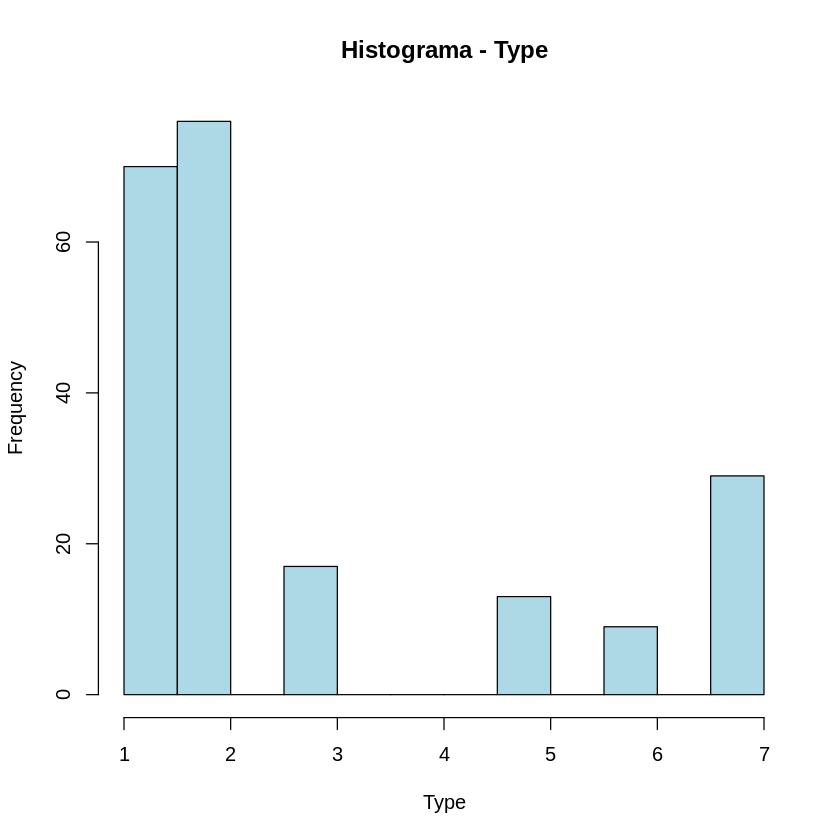

In [ ]:
# Plotar histogramas
par(mfrow = c(1, 1))  # Layout 1X1
for (col in colnames(data)) {
  hist(data[[col]],
       main = paste("Histograma -", col),
       xlab = col,
       col = "lightblue",
       border = "black")
}

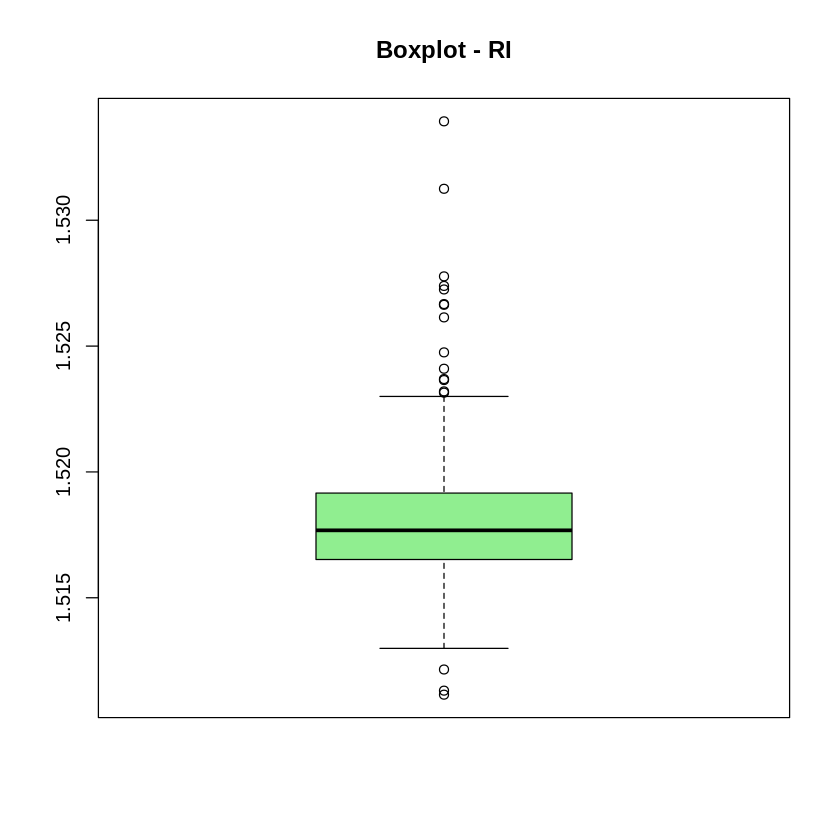

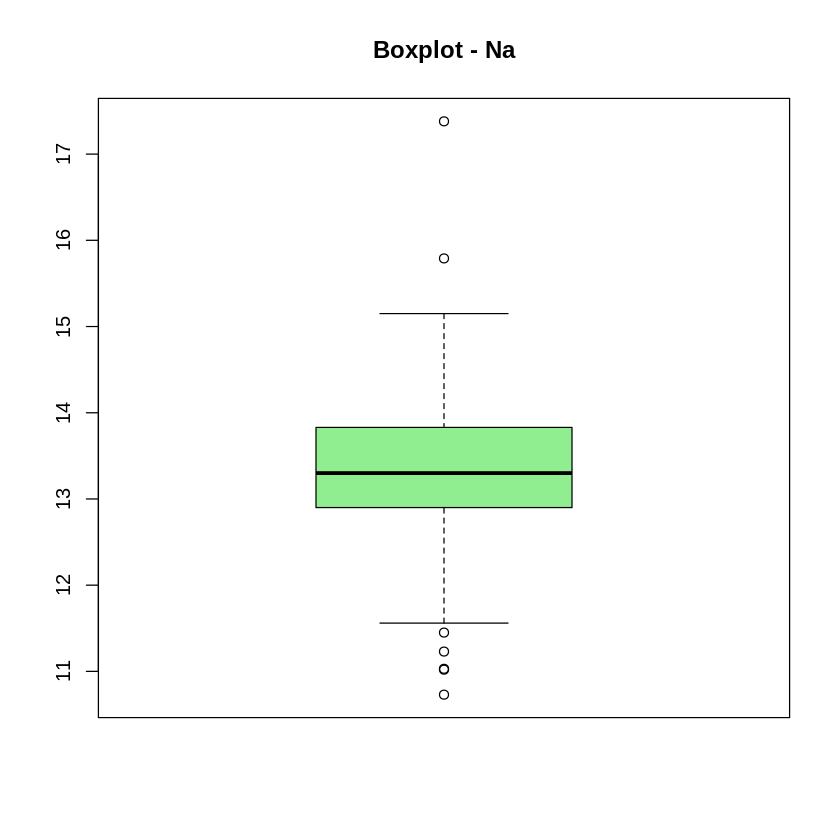

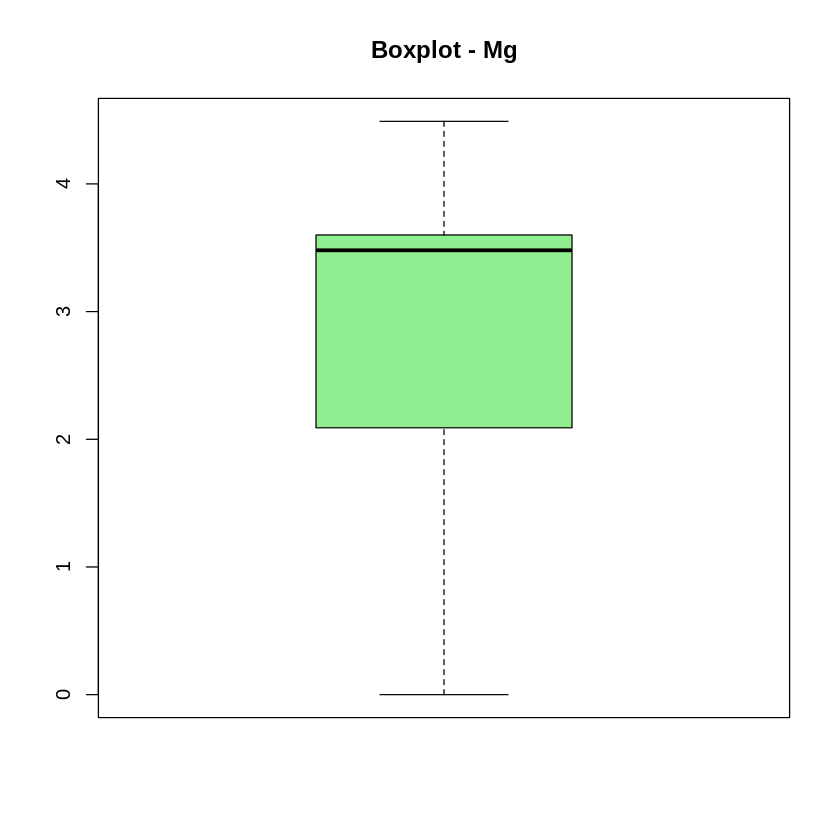

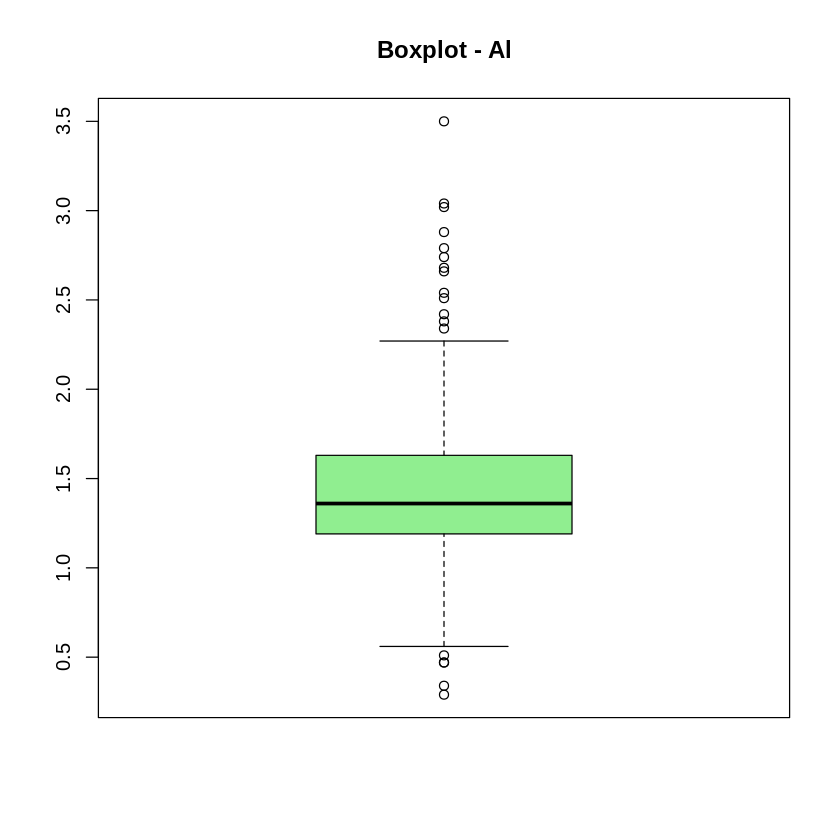

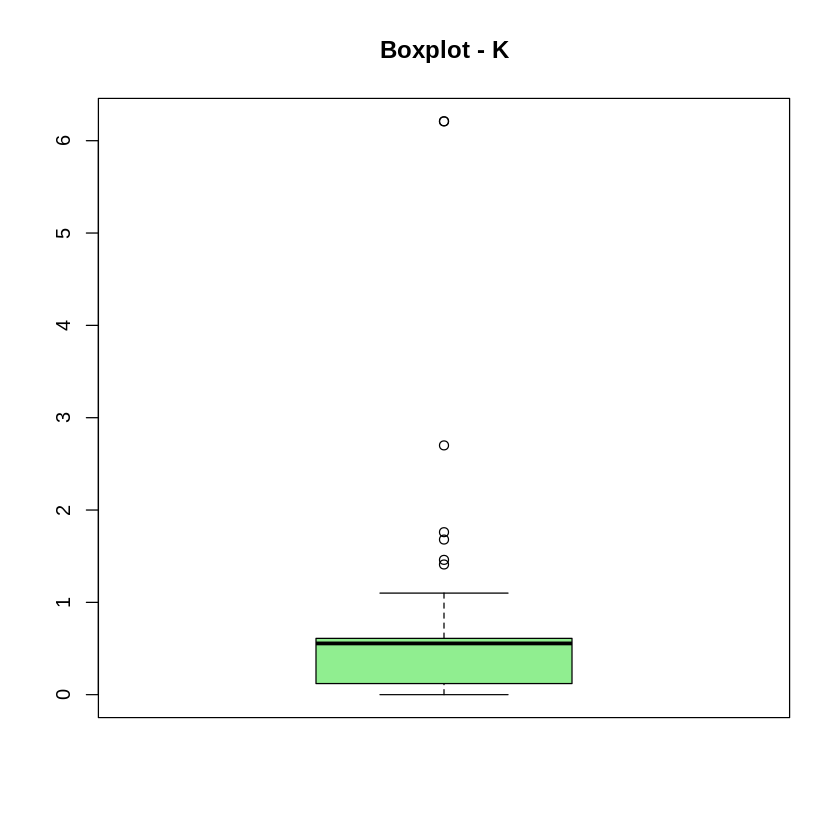

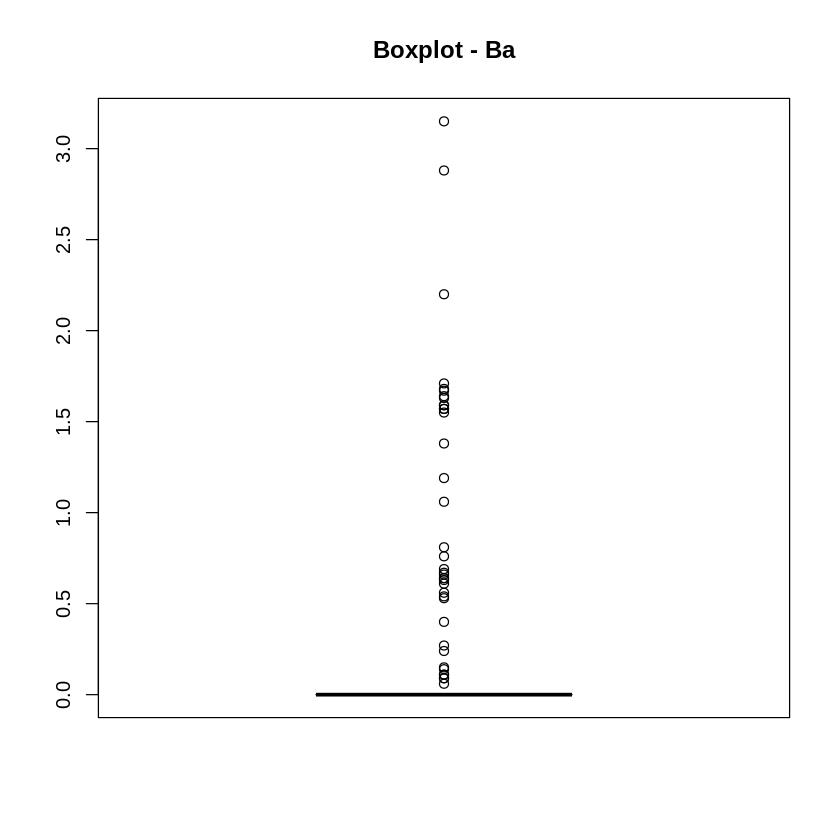

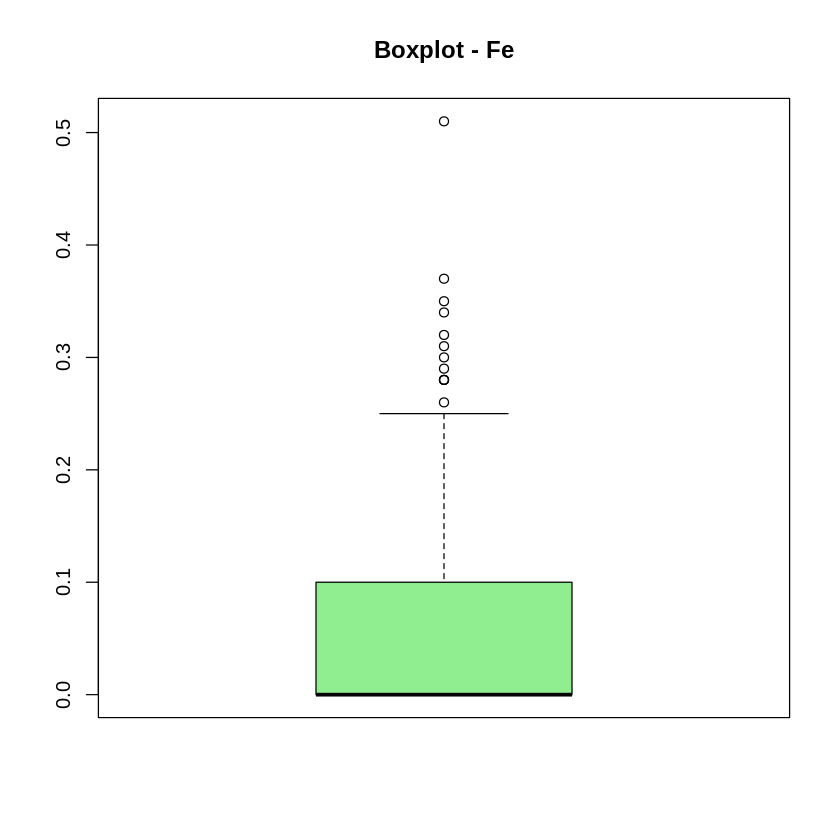

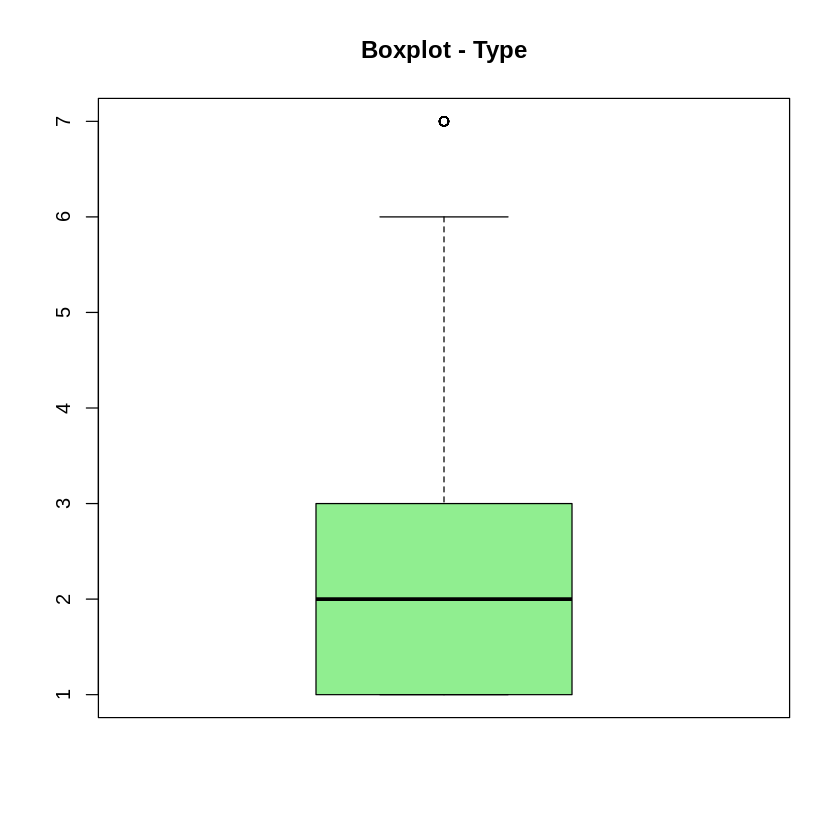

In [ ]:
# Plotar boxplots
par(mfrow = c(1, 1))  # Layout 1X1
for (col in colnames(data)) {
  boxplot(data[[col]],
          main = paste("Boxplot -", col),
          col = "lightgreen",
          horizontal = FALSE)
}
par(mfrow = c(1, 1))

In [ ]:
# Remova colunas n√£o num√©ricas, como a classe
num_data <- data[, sapply(data, is.numeric)]
num_data$Type <- NULL  # garantir que n√£o est√° na matriz num√©rica

# Treinar Isolation Forest (pode ajustar ntree, sample_size e contamination)
iso_model <- isolation.forest(num_data, ntrees = 100, sample_size = 256, ndim=1)

# Obter scores de anomalia (quanto maior, mais an√¥malo)
anomaly_scores <- predict(iso_model, num_data)

# Definir um limite de corte para outliers (exemplo: top 5% mais an√¥malos)
threshold <- quantile(anomaly_scores, 0.95)

# Marcar as linhas com scores maiores que o threshold como outliers
outliers <- anomaly_scores > threshold

# Quantidade de linhas antes
n_before <- nrow(data)

# Remover outliers
data_clean <- data[!outliers, ]

# Quantidade de linhas depois
n_after <- nrow(data_clean)

cat("N√∫mero de linhas exclu√≠das devido a outliers (Isolation Forest):", n_before - n_after, "\n")

# Mostrar balanceamento das classes antes
cat("Balanceamento de classes antes da remo√ß√£o de outliers:\n")
print(table(data$Type))

# Mostrar balanceamento das classes depois
cat("Balanceamento de classes ap√≥s remo√ß√£o de outliers:\n")
print(table(data_clean$Type))

Warning message in isolation.forest(num_data, ntrees = 100, sample_size = 256, ndim = 1):
‚Äú'sample_size' is larger than the number of rows in 'data', will be decreased.‚Äù


N√∫mero de linhas exclu√≠das devido a outliers (Isolation Forest): 11 
Balanceamento de classes antes da remo√ß√£o de outliers:

 1  2  3  5  6  7 
70 76 17 13  9 29 
Balanceamento de classes ap√≥s remo√ß√£o de outliers:

 1  2  3  5  6  7 
70 73 17  9  8 26 


In [ ]:
# Testes de normalidade multivariada
result_mardia <- mvn(data = data_clean, mvnTest = "mardia")
result_hz <- mvn(data = data_clean, mvnTest = "hz")
result_royston <- mvn(data = data_clean, mvnTest = "royston")

# Teste de normalidade univariada (Shapiro-Wilk para cada vari√°vel)
shapiro_tests <- sapply(data_clean, function(var) shapiro.test(var)$p.value)

# ---- Resultados ----
cat("\nüîç Teste de Normalidade Multivariada: Mardia\n")
print(result_mardia$multivariateNormality)
cat(ifelse(result_mardia$multivariateNormality$Result == "Data follows multivariate normal distribution",
           "‚úÖ Os dados seguem distribui√ß√£o normal segundo Mardia.\n",
           "‚ùå Os dados **n√£o** seguem distribui√ß√£o normal segundo Mardia.\n"))

cat("\nüîç Teste de Normalidade Multivariada: Henze-Zirkler\n")
print(result_hz$multivariateNormality)
cat(ifelse(result_hz$multivariateNormality$Result == "Data follows multivariate normal distribution",
           "‚úÖ Os dados seguem distribui√ß√£o normal segundo Henze-Zirkler.\n",
           "‚ùå Os dados **n√£o** seguem distribui√ß√£o normal segundo Henze-Zirkler.\n"))

cat("\nüîç Teste de Normalidade Multivariada: Royston\n")
print(result_royston$multivariateNormality)
cat(ifelse(result_royston$multivariateNormality$Result == "Data follows multivariate normal distribution",
           "‚úÖ Os dados seguem distribui√ß√£o normal segundo Royston.\n",
           "‚ùå Os dados **n√£o** seguem distribui√ß√£o normal segundo Royston.\n"))

cat("\nüîç Teste de Normalidade Univariada (Shapiro-Wilk):\n")
print(round(shapiro_tests, 4))

# Interpreta√ß√£o do Shapiro-Wilk
non_normal_vars <- names(shapiro_tests[shapiro_tests < 0.05])
if (length(non_normal_vars) == 0) {
  cat("‚úÖ Todas as vari√°veis passam no teste de normalidade univariada (p > 0.05).\n")
} else {
  cat("‚ùå As seguintes vari√°veis **n√£o** seguem distribui√ß√£o normal (p < 0.05): ",
      paste(non_normal_vars, collapse = ", "), "\n")
}


üîç Teste de Normalidade Multivariada: Mardia
             Test        Statistic p value Result
1 Mardia Skewness 3087.19634517083       0     NO
2 Mardia Kurtosis 59.4984624648266       0     NO
3             MVN             <NA>    <NA>     NO
‚ùå Os dados **n√£o** seguem distribui√ß√£o normal segundo Mardia.
 ‚ùå Os dados **n√£o** seguem distribui√ß√£o normal segundo Mardia.
 ‚ùå Os dados **n√£o** seguem distribui√ß√£o normal segundo Mardia.

üîç Teste de Normalidade Multivariada: Henze-Zirkler
           Test       HZ p value MVN
1 Henze-Zirkler 4.373309       0  NO

üîç Teste de Normalidade Multivariada: Royston
     Test        H      p value MVN
1 Royston 482.3409 6.043685e-99  NO

üîç Teste de Normalidade Univariada (Shapiro-Wilk):
  RI   Na   Mg   Al   Si    K   Ca   Ba   Fe Type 
   0    0    0    0    0    0    0    0    0    0 
‚ùå As seguintes vari√°veis **n√£o** seguem distribui√ß√£o normal (p < 0.05):  RI, Na, Mg, Al, Si, K, Ca, Ba, Fe, Type 


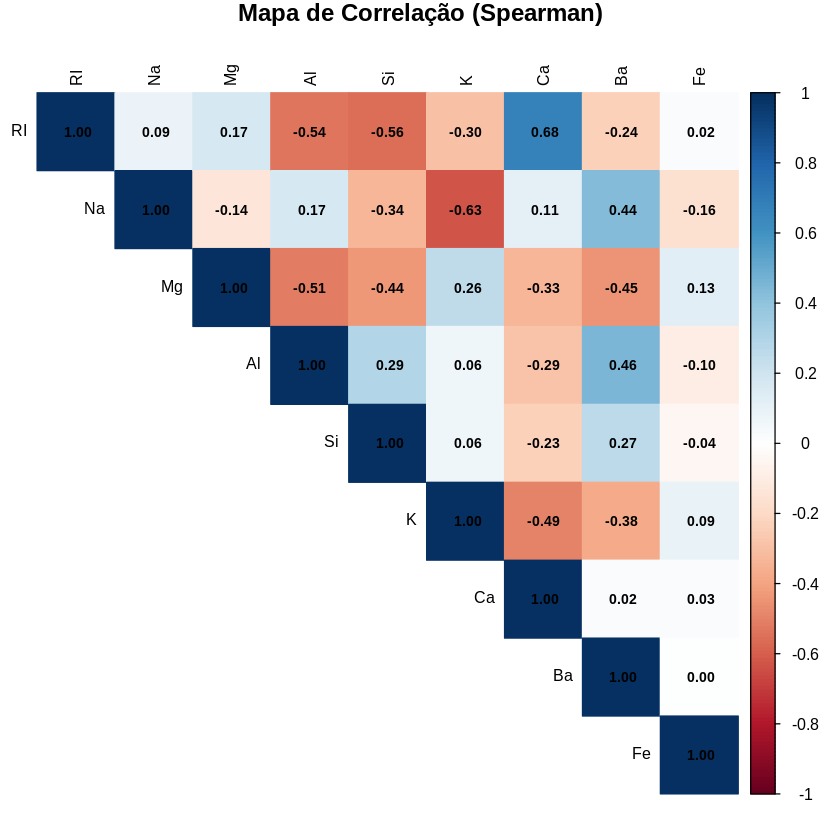

In [ ]:
# Calcular correla√ß√£o de Spearman
cor_matrix <- cor(data_clean[, -ncol(data_clean)], method = "spearman")

# Mapa de correla√ß√£o
library(corrplot)
corrplot(cor_matrix, method = "color", type = "upper",
         tl.col = "black", tl.cex = 0.8,
         addCoef.col = "black", number.cex = 0.7,
         title = "Mapa de Correla√ß√£o (Spearman)", mar = c(0,0,1,0))

In [ ]:
png("scatter_matrix.png", width = 1600, height = 1600, res = 150)
pairs(data_clean[, -ncol(data_clean)], panel = function(x, y) {
  points(x, y, pch = 19, col = rgb(0.1, 0.1, 0.8, 0.3))
  abline(lm(y ~ x), col = "red")
})
dev.off()

pdf 
  2

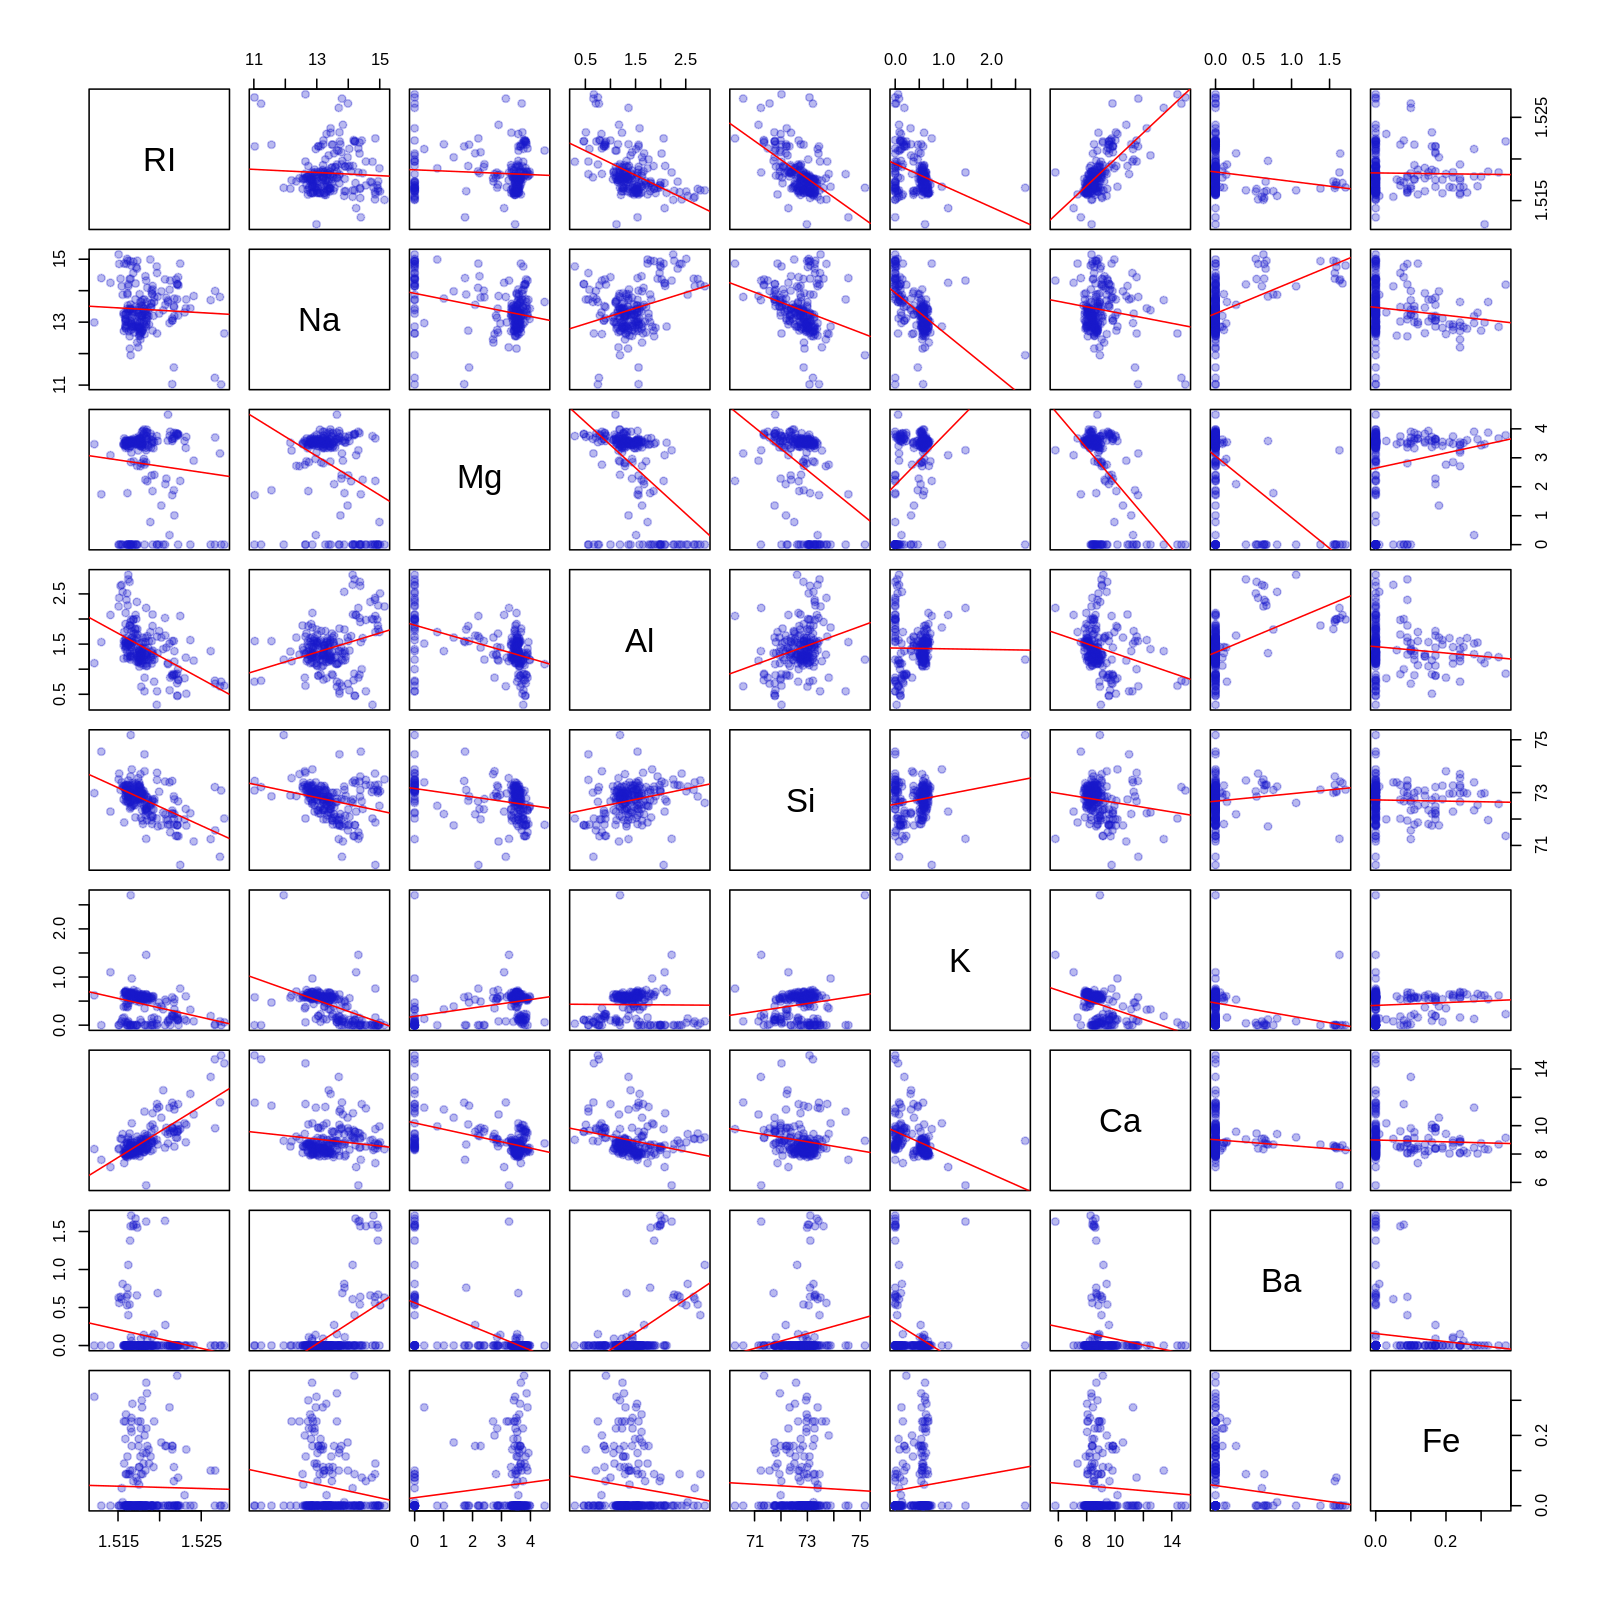

In [ ]:
# --- Normaliza√ß√£o Min-Max ---
normalize_minmax <- function(x) {
  return((x - min(x)) / (max(x) - min(x)))
}

data_minmax <- as.data.frame(lapply(data_clean[ , -ncol(data_clean)], normalize_minmax))
data_minmax$Type <- data_clean$Type
cat("Normaliza√ß√£o Min-Max conclu√≠da.\n")
print(data_minmax)

Normaliza√ß√£o Min-Max conclu√≠da.
            RI          Na         Mg         Al         Si           K
1   0.56722151 0.634382567 1.00000000 0.31274131 0.30894309 0.022222222
2   0.34955186 0.694915254 0.80178174 0.41312741 0.50203252 0.177777778
3   0.25800256 0.607748184 0.79064588 0.48262548 0.55487805 0.144444444
4   0.35275288 0.530266344 0.82182628 0.38610039 0.47764228 0.211111111
5   0.33738796 0.544794189 0.80623608 0.36679537 0.57317073 0.203703704
6   0.24391805 0.428571429 0.80400891 0.51351351 0.55081301 0.237037037
7   0.33802817 0.552058111 0.80178174 0.32818533 0.57520325 0.214814815
8   0.34635083 0.515738499 0.80400891 0.29343629 0.60569106 0.211111111
9   0.45006402 0.731234867 0.79732739 0.41698842 0.36991870 0.207407407
10  0.34571063 0.479418886 0.80178174 0.41312741 0.55487805 0.211111111
11  0.22791293 0.411622276 0.77060134 0.49034749 0.59756098 0.248148148
12  0.35083227 0.430992736 0.81514477 0.37837838 0.55894309 0.222222222
13  0.23943662 0.450363196 0.

## RESUMO

- N√£o linear
- Sem alta correla√ß√£o entre as vari√°veis
- Distribui√ß√£o n√£o segue uma normal

# REDU√á√ÉO DA DIMENSIONALIDE (DimRED)

2025-05-27 00:40:07.235587: Isomap START

2025-05-27 00:40:07.238858: constructing knn graph

2025-05-27 00:40:07.281111: calculating geodesic distances

2025-05-27 00:40:07.326279: Classical Scaling

Warning message in matchPars(methodObject, list(...)):
‚ÄúParameter matching: .control is not a standard parameter, ignoring.‚Äù
2025-05-27 00:40:07.880656: Calculating kernel PCA

2025-05-27 00:40:07.934476: Trying to calculate reverse

2025-05-27 00:40:07.952638: DONE



List of 23
 $ python              : chr "/root/.cache/uv/archive-v0/V9xlDMVUlZYfnJwT2htiJ/bin/python3"
 $ libpython           : chr "/root/.local/share/uv/python/cpython-3.11.11-linux-x86_64-gnu/lib/libpython3.11.so"
 $ pythonhome          : chr "/root/.cache/uv/archive-v0/V9xlDMVUlZYfnJwT2htiJ:/root/.cache/uv/archive-v0/V9xlDMVUlZYfnJwT2htiJ"
 $ pythonpath          : chr "/env/python:/root/.local/share/uv/python/cpython-3.11.11-linux-x86_64-gnu/lib/python311.zip:/root/.local/share/"| __truncated__
 $ prefix              : chr "/root/.cache/uv/archive-v0/V9xlDMVUlZYfnJwT2htiJ"
 $ exec_prefix         : chr "/root/.cache/uv/archive-v0/V9xlDMVUlZYfnJwT2htiJ"
 $ base_exec_prefix    : chr "/root/.local/share/uv/python/cpython-3.11.11-linux-x86_64-gnu"
 $ virtualenv          : chr "/root/.cache/uv/archive-v0/V9xlDMVUlZYfnJwT2htiJ"
 $ virtualenv_activate : chr "/root/.cache/uv/archive-v0/V9xlDMVUlZYfnJwT2htiJ/bin/activate_this.py"
 $ executable          : chr "/root/.cache/uv/archive-v0/V9xlD

Erro ao aplicar o m√©todo UMAP: Error: Python module umap was not found.

Detected Python configuration:





Erro ao aplicar o m√©todo ICA: Error in match.arg(.method): 'arg' should be one of ‚ÄúDiffusionMaps‚Äù, ‚ÄúDRR‚Äù, ‚ÄúFastICA‚Äù, ‚ÄúKamadaKawai‚Äù, ‚ÄúDrL‚Äù, ‚ÄúFruchtermanReingold‚Äù, ‚ÄúHLLE‚Äù, ‚ÄúIsomap‚Äù, ‚ÄúkPCA‚Äù, ‚ÄúPCA_L1‚Äù, ‚ÄúMDS‚Äù, ‚ÄúnMDS‚Äù, ‚ÄúNNMF‚Äù, ‚ÄúPCA‚Äù, ‚ÄútSNE‚Äù, ‚ÄúUMAP‚Äù




Performing eigendecomposition
Computing Diffusion Coordinates
Elapsed time: 0.397 seconds


Warning message in rankmatrix(dX, input = "dist", use):
‚Äú0 outside of diagonal in distance matrix‚Äù
Warning message in rankmatrix(dX, input = "dist", use):
‚Äú0 outside of diagonal in distance matrix‚Äù
Warning message in rankmatrix(dX, input = "dist", use):
‚Äú0 outside of diagonal in distance matrix‚Äù
Warning message in rankmatrix(dX, input = "dist", use):
‚Äú0 outside of diagonal in distance matrix‚Äù
Warning message in rankmatrix(dX, input = "dist", use):
‚Äú0 outside of diagonal in distance matrix‚Äù
Warning message in rankmatrix(dX, input = "dist", use):
‚Äú0 outside of diagonal in distance matrix‚Äù
Warning message in rankmatrix(dX, input = "dist", use):
‚Äú0 outside of diagonal in distance matrix‚Äù
Warning message in rankmatrix(dX, input = "dist", use):
‚Äú0 outside of diagonal in distance matrix‚Äù
Warning message in rankmatrix(dX, input = "dist", use):
‚Äú0 outside of diagonal in distance matrix‚Äù
Warning message in rankmatrix(dX, input = "dist", use):
‚Äú0 outside of d

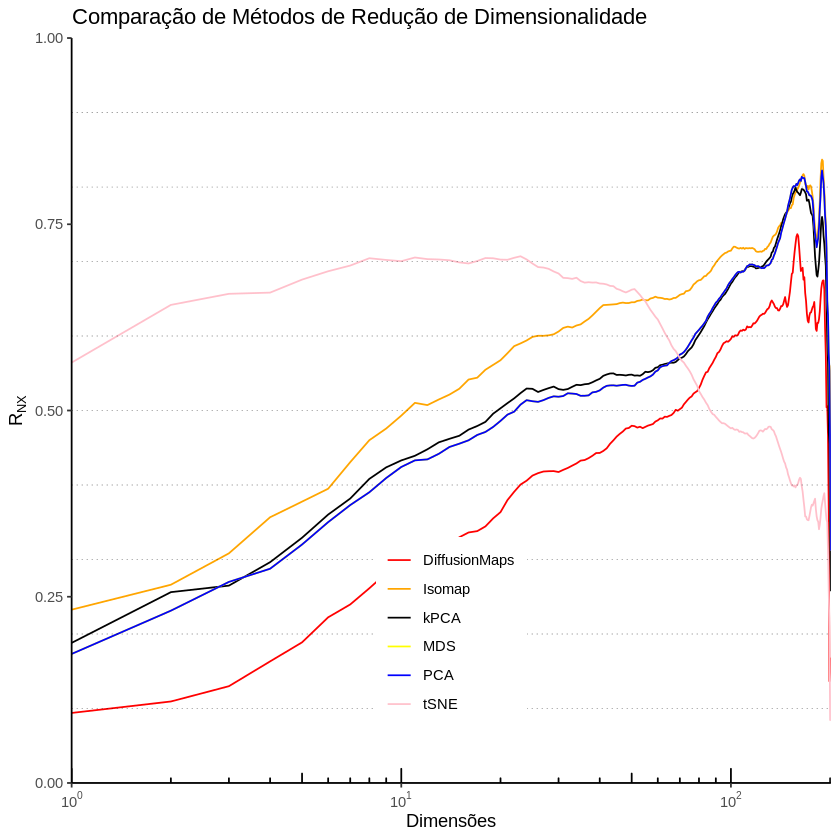

In [ ]:
#OK - METODO DE REDU√á√ÉO DE DIMENSIONALIDADE
# Dados: excluir coluna de classe e converter para dimRedData
data_minmax_vars <- data_minmax[, -ncol(data_minmax)]
data_dr <- dimRedData(data_minmax_vars)
classe <- as.factor(data_clean[, ncol(data_clean)])

# Definir m√©todos de redu√ß√£o de dimensionalidade v√°lidos para `dimRed`
embed_methods <- c("PCA", "Isomap", "tSNE", "kPCA", "MDS", "UMAP", "ICA", "DiffusionMaps")

# Configura√ß√£o espec√≠fica de `ndim` para kPCA
kPCA_control <- list(ndim = 5)  # Ajuste o n√∫mero de dimens√µes de sa√≠da conforme necess√°rio

# Aplicar m√©todos de redu√ß√£o de dimensionalidade sem passar `method` como par√¢metro
data_emb <- lapply(embed_methods, function(method) {
  tryCatch(
    {
      # Verificar se o m√©todo requer pacotes espec√≠ficos (tSNE e UMAP)
      if (method == "tSNE" && !requireNamespace("Rtsne", quietly = TRUE)) {
        stop("Pacote 'Rtsne' n√£o encontrado. Instale com install.packages('Rtsne')")
      }
      if (method == "UMAP" && !requireNamespace("umap", quietly = TRUE)) {
        stop("Pacote 'umap' n√£o encontrado. Instale com install.packages('umap')")
      }
      if (method == "Isomap" && !requireNamespace("RANN", quietly = TRUE)) {
        stop("Pacote 'RANN' n√£o encontrado. Instale com install.packages('RANN')")
      }
      if (method == "DiffusionMaps" && !requireNamespace("diffusionMap", quietly = TRUE)) {
        stop("Pacote 'diffusionMap' n√£o encontrado. Instale com install.packages('diffusionMap')")
      }
      # Aplicar o m√©todo de redu√ß√£o de dimensionalidade
      #emb <- dimRed::embed(data_dr[,1:8], .method = method)  # Passar o m√©todo diretamente como string
            if (method == "kPCA") {
        emb <- dimRed::embed(data_dr[,1:8], .method = method, .control = kPCA_control)
      } else {
        emb <- dimRed::embed(data_dr[,1:8], .method = method)
      }

      if (!is.null(emb)) emb else NULL  # Filtrar m√©todos que falharam
    },
    error = function(e) {
      message("Erro ao aplicar o m√©todo ", method, ": ", e)
      NULL
    }
  )
})
names(data_emb) <- embed_methods
data_emb <- Filter(Negate(is.null), data_emb)  # Remover m√©todos com falhas

# Plotar as curvas R_NX para m√©todos v√°lidos
if (length(data_emb) > 0) {
  plot <- dimRed::plot_R_NX(data_emb) +
    ggplot2::theme(
      legend.title = ggplot2::element_blank(),
      legend.position = c(0.5, 0.1),
      legend.justification = c(0.5, 0.1)
    ) +
    ggplot2::labs(
      title = "Compara√ß√£o de M√©todos de Redu√ß√£o de Dimensionalidade",
      x = "Dimens√µes",
      y = "Curva R_NX"
    ) +
      # Alterar cor da curva do m√©todo Isomap
    ggplot2::scale_color_manual(
      values = c("Isomap" = "orange", # Altere para "black" se desejar
                 "PCA" = "blue",
                 "FastICA" = "green",
                 "tSNE" = "pink",
                 "DiffusionMaps" = "red",
                 "MDS"="yellow",
                 "kPCA"="black") # Changed #black to "black"

    )
  print(plot)
} else {
  message("Nenhum m√©todo de redu√ß√£o de dimensionalidade p√¥de ser aplicado.")
}


In [ ]:
# Salvar a figura maior ap√≥s cri√°-la
ggsave("dimred_comparacao.png", plot = plot, width = 12, height = 8, dpi = 300)

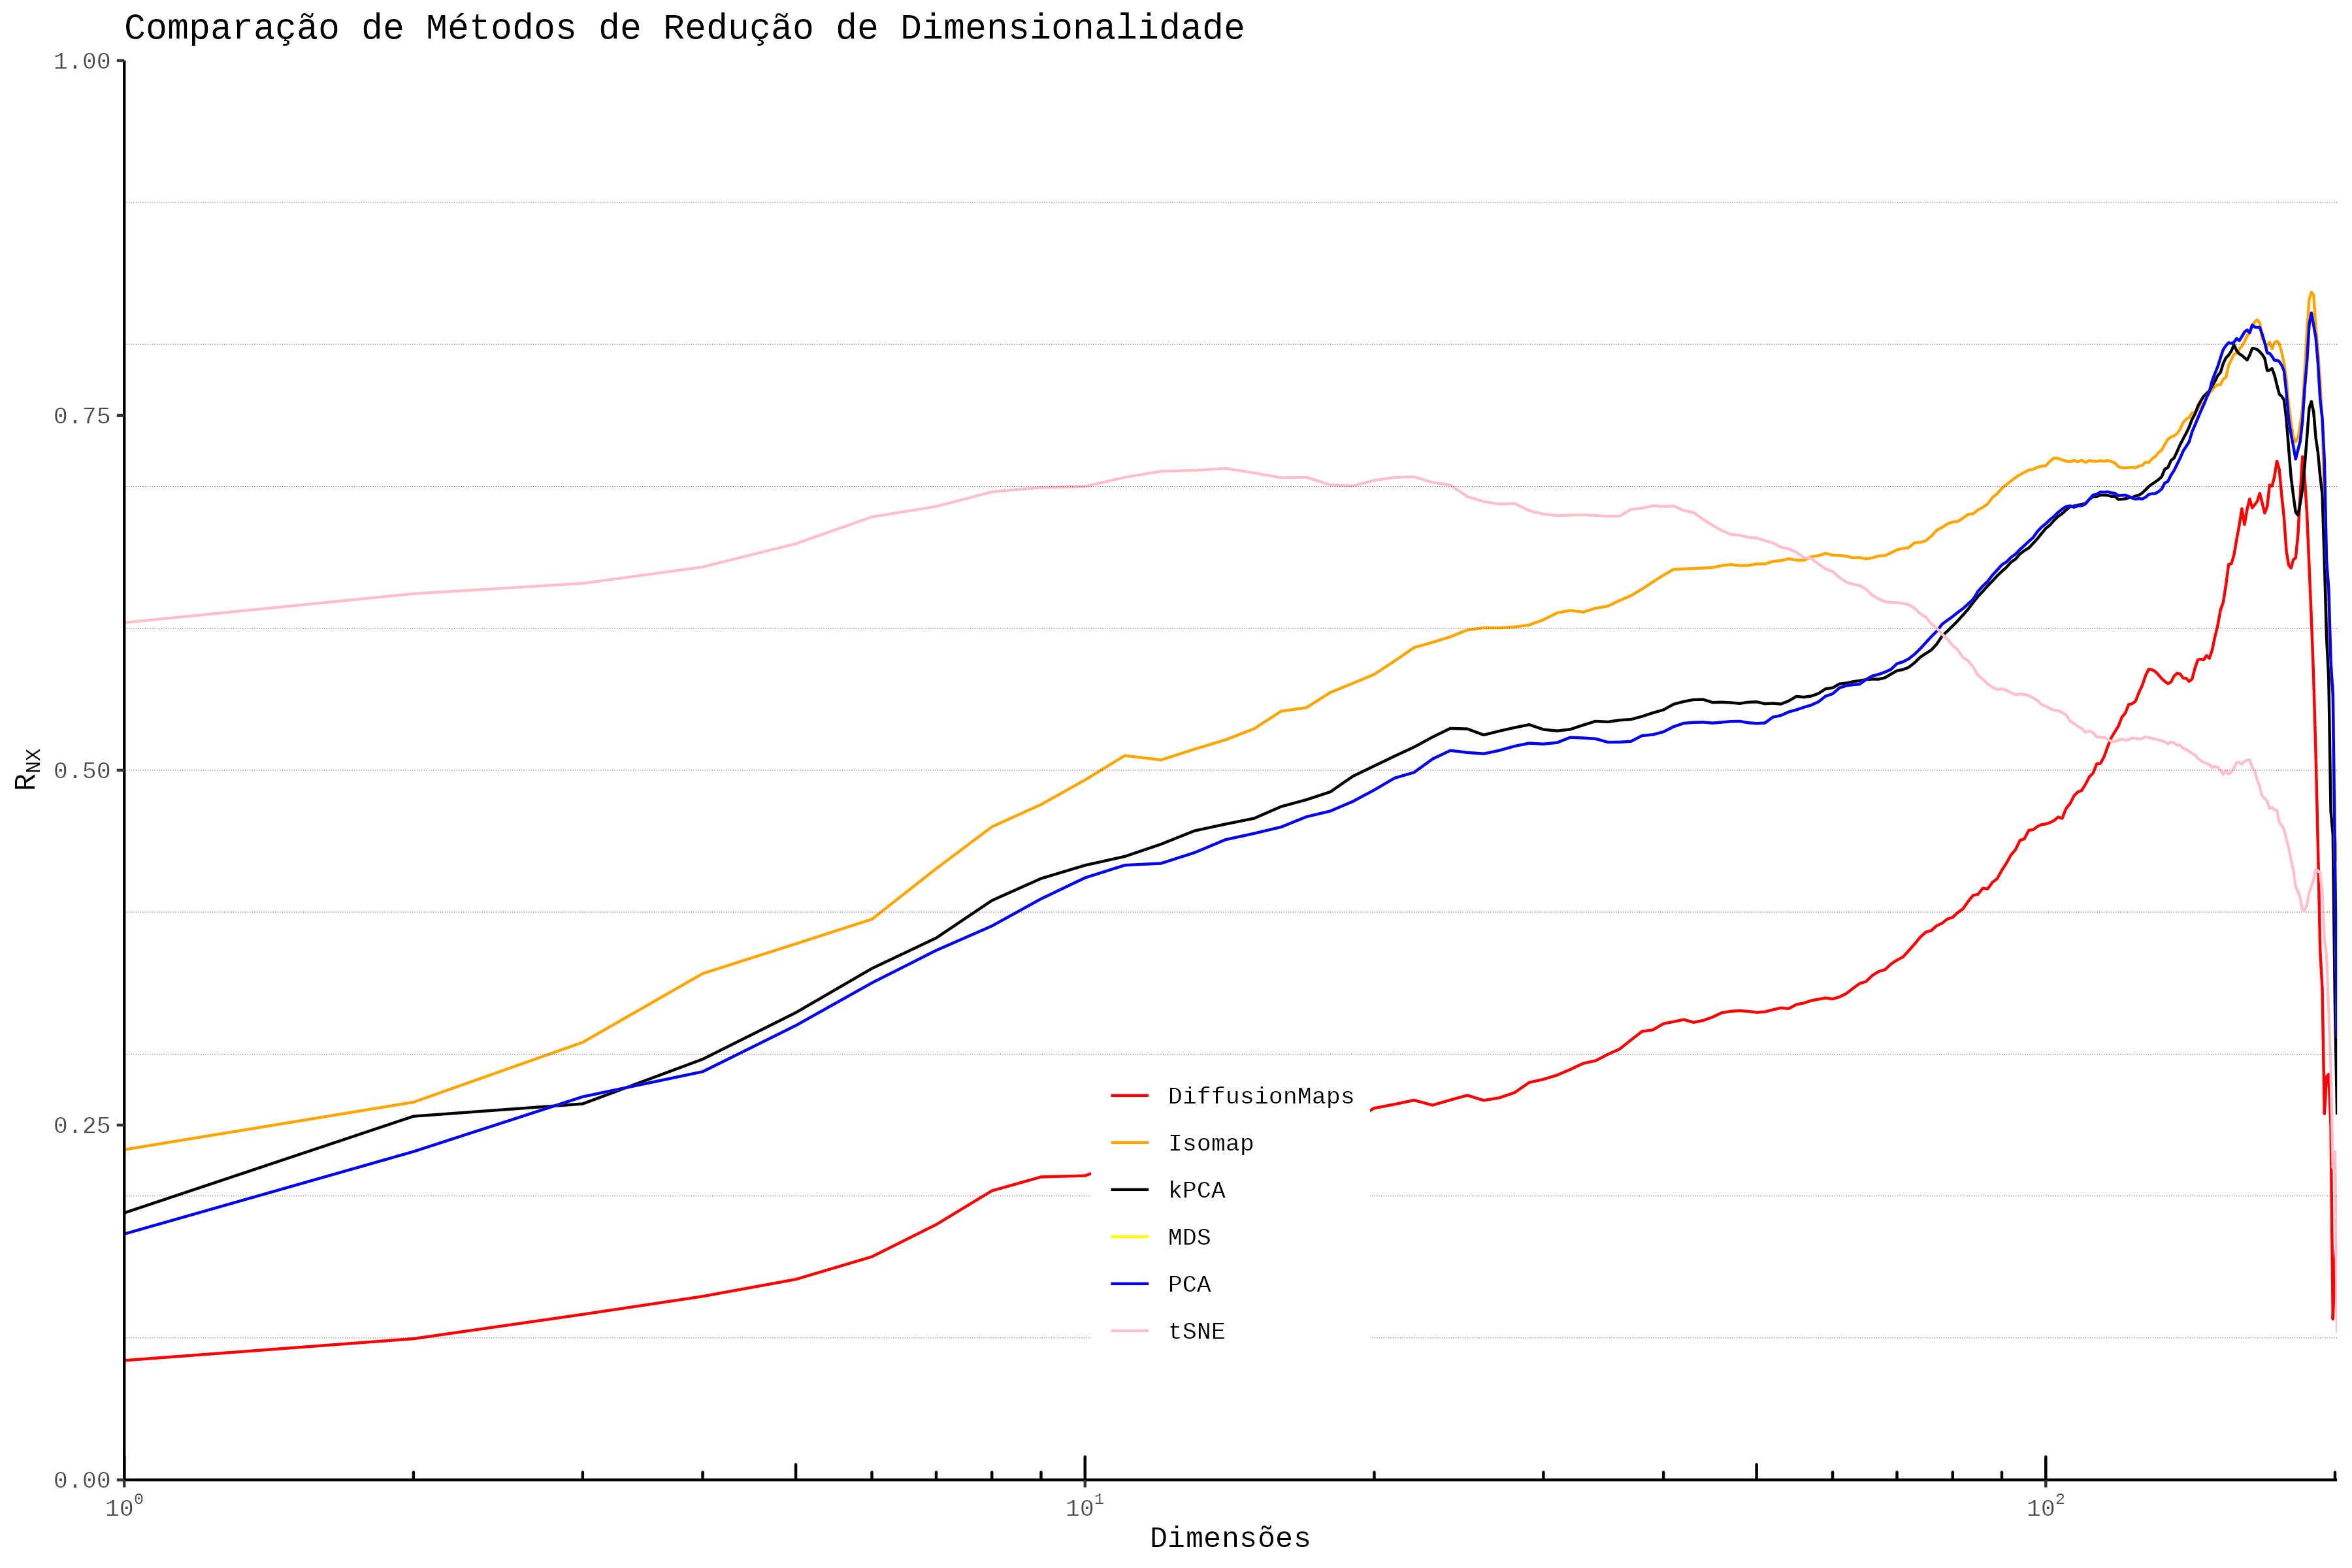

In [ ]:
auc_results <- sapply(data_emb, function(emb) {
  rnx <- dimRed::R_NX(emb)  # extrai o vetor R_NX para o embedding

  dims <- seq_along(rnx)  # eixo x √© o n√∫mero da dimens√£o

  # Regra do trap√©zio para √°rea sob a curva
  sum(diff(dims) * (head(rnx, -1) + tail(rnx, -1)) / 2)
})

# Ordenar do maior para o menor (melhor m√©todo no topo)
auc_sorted <- sort(auc_results, decreasing = TRUE)

print(auc_sorted)

Warning message in rankmatrix(dX, input = "dist", use):
‚Äú0 outside of diagonal in distance matrix‚Äù
Warning message in rankmatrix(dX, input = "dist", use):
‚Äú0 outside of diagonal in distance matrix‚Äù
Warning message in rankmatrix(dX, input = "dist", use):
‚Äú0 outside of diagonal in distance matrix‚Äù
Warning message in rankmatrix(dX, input = "dist", use):
‚Äú0 outside of diagonal in distance matrix‚Äù
Warning message in rankmatrix(dX, input = "dist", use):
‚Äú0 outside of diagonal in distance matrix‚Äù
Warning message in rankmatrix(dX, input = "dist", use):
‚Äú0 outside of diagonal in distance matrix‚Äù
Warning message in rankmatrix(dX, input = "dist", use):
‚Äú0 outside of diagonal in distance matrix‚Äù
Warning message in rankmatrix(dX, input = "dist", use):
‚Äú0 outside of diagonal in distance matrix‚Äù
Warning message in rankmatrix(dX, input = "dist", use):
‚Äú0 outside of diagonal in distance matrix‚Äù
Warning message in rankmatrix(dX, input = "dist", use):
‚Äú0 outside of d

       Isomap           PCA           MDS          kPCA DiffusionMaps 
     136.0783      126.9552      126.9552      125.9705      107.2490 
         tSNE 
     102.8121 


# Utilizando o ISOMAP

Maior √°rea abaixo da curva

In [ ]:
# Aplicar Isomap com n√∫mero de dimens√µes desejadas
isomap_result <- dimRed::embed(data_dr, .method = "Isomap", .control = list(ndim = 2))  # Altere ndim se quiser mais dimens√µes

# Verificar o tipo de objeto retornado
print(class(isomap_result))

# Exibir a estrutura do objeto retornado
print(str(isomap_result))

In [ ]:
# Aplicar Isomap com n√∫mero de dimens√µes desejadas
isomap_result <- dimRed::embed(data_dr, .method = "Isomap", .control = list(ndim = 2))  # Altere ndim se quiser mais dimens√µes

# Extrair os dados transformados diretamente do objeto dimRedResult
reduced_data <- as.data.frame(isomap_result@data)

# Verificar resultado
head(reduced_data)

In [ ]:
# Adicionar a coluna da classe (se ainda n√£o fez isso)
reduced_data$classe <- classe

# Plotar as dimens√µes reduzidas
ggplot(reduced_data, aes(x = iso.1, y = iso.2, color = classe)) +
  geom_point(alpha = 0.7, size = 3) +
  labs(
    title = "Representa√ß√£o Bidimensional com Isomap",
    x = "Componente Isomap 1",
    y = "Componente Isomap 2",
    color = "Classe"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
    axis.title = element_text(size = 14),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10)
  )